# Assignment 3: Using RNN to predict stock price           

# Step 1: Data Aquisition and Insight Creation.


In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

The historical stock data is collected from the Google Stock Price through the link on the assignment 3 instruction file and this historical data is used for the prediction of future stock prices.\
'read_csv()' is an important pandas function to read csv files and do operations on it.

In [173]:
# Reading training dataset.
dataset_google = pd.read_csv('/Users/Viryuth/Documents/Deep_Learning/Assignment_3/data/Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)


In [174]:
# Printing top 5 rows of dataset.
dataset_google .head()


,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [175]:
# Similarly, printing last 5 rows of dataset.
dataset_google .tail()


,Open,High,Low,Close,Volume
Date,,,,,
2016-12-23,790.90,792.74,787.28,789.91,"623,400"
2016-12-27,790.68,797.86,787.66,791.55,"789,100"
2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"
2016-12-29,783.33,785.93,778.92,782.79,"744,300"
2016-12-30,782.75,782.78,770.41,771.82,"1,770,000"


In [176]:
# Check if any of data is not applicable.
# The Boolean output 'False' represents that we have no non-applicable values.
dataset_google .isna().any()


Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [177]:
# Now printing the basic informations of our dataset.
dataset_google .info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


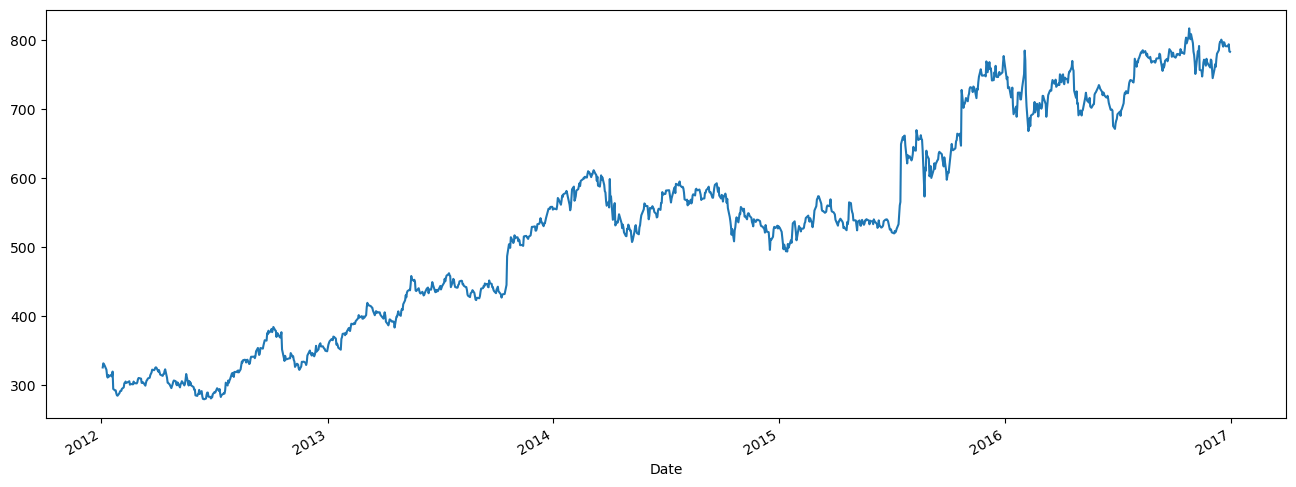

In [178]:
# Now plotting graph for growth of opening price from 2012 to 2017.
dataset_google ['Open'].plot(figsize=(16,6))
plt.savefig("dataset_google ")

**As we have noticed earlier from the data that three of the columns have data types** _float_ **while two have** _object_ **. Hence to homogenize it we are going to convert the column types of the dataframe.**

In [179]:
# converting str to str and replacing commas with None:
dataset_google["Volume"] = dataset_google["Volume"].astype(str).str.replace(',', '')

# Converting str to float
dataset_google["Volume"] = dataset_google["Volume"].astype(float)


In [180]:

# converting str to str and replacing commas with None:
dataset_google["Close"] = dataset_google["Close"].astype(str).str.replace(',', '')

# Converting str to float
dataset_google["Close"] = dataset_google["Close"].astype(float)

In [181]:
# Now again checking the data types of given columns.
dataset_google.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   float64
dtypes: float64(5)
memory usage: 59.0 KB


### Taking a look at rolling averages (or often called as 'rolling mean')

In statistics, a rolling average (also known as a moving average or running average) is a computation that analyses data points by generating a sequence of averages from various subsets of the complete data set. It is also referred to as a moving mean (MM) or rolling mean, and constitutes a form of finite impulse response filter.


**That means a Simple Rolling Average is the unweighted mean of the last n values.**

In [182]:
# Now we are interested in calculating 7 day rolling mean of our stock price.
dataset_google.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


### Okay! Let's compare our earlier graph of growth of 'Open' price with the rolling average curve for the same:
* earlier graph represented by blue color
* and rolling graph represented by orange color

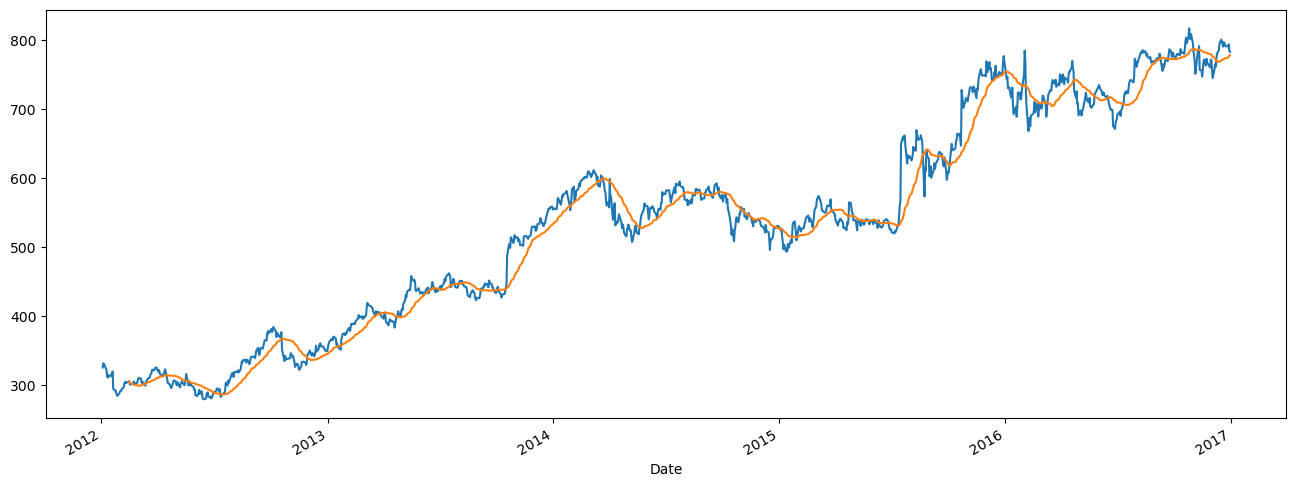

In [183]:
# Ploting 30 day rolling mean of 'Open' price along with
# the earlier graph of growth of 'Open' price.
dataset_google['Open'].plot(figsize=(16,6))
dataset_google.rolling(window=30).mean()['Open'].plot()
plt.savefig("dataset_google")

### Now compare 'Close' price with its rolling mean:

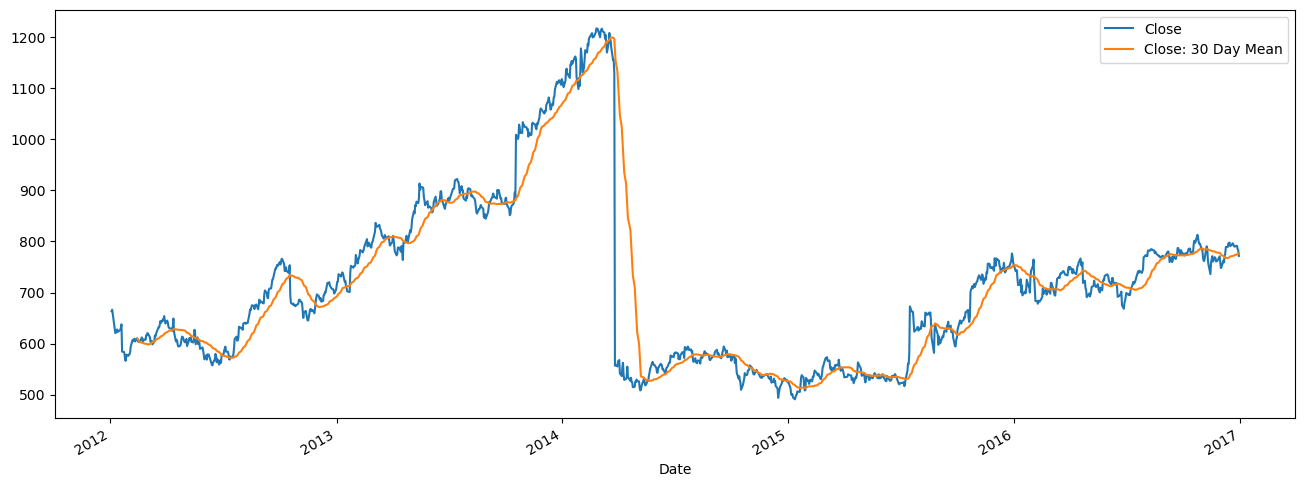

In [184]:
# Plotting graph of 'Close' price with its 30 day rolling mean.
dataset_google['Close: 30 Day Mean'] = dataset_google['Close'].rolling(window=30).mean()
dataset_google[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))
plt.savefig("dataset_google")


**We also have an option to specify a minimum number of period. So if we keep a minimum period of 1 then it means that minimum number of observation per window (which is of 30 days) should be one.**

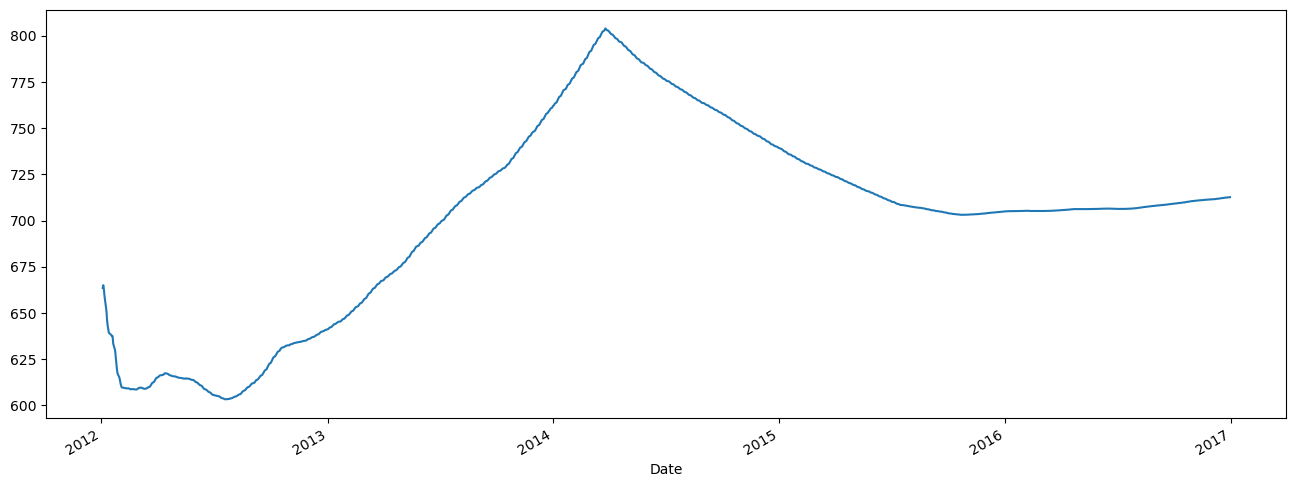

In [185]:
# Optionally we can specify a minimum number of periods.
dataset_google['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))
plt.savefig("dataset_apple")


# RNN Model

In [186]:
from sklearn.preprocessing import MinMaxScaler
bono = pd.read_csv('archive/Google_Stock_Price_Train.csv',parse_dates=True)
bono = bono.iloc[:,1:]

# converting str to str and replacing commas with None:
bono["Volume"] = bono["Volume"].astype(str).str.replace(',', '')

# Converting str to float
bono["Volume"] = bono["Volume"].astype(float)

# converting str to str and replacing commas with None:
bono["Close"] = bono["Close"].astype(str).str.replace(',', '')

# Converting str to float
bono["Close"] = bono["Close"].astype(float)

scaler = MinMaxScaler()
bono[bono.columns] = scaler.fit_transform(bono)


In [187]:
bono

,Open,High,Low,Close,Volume
0,0.085814,0.096401,0.090449,0.237573,0.295258
1,0.097012,0.098344,0.098235,0.241514,0.229936
2,0.094334,0.092517,0.094086,0.228781,0.263612
3,0.091562,0.088819,0.088006,0.216419,0.216179
4,0.079842,0.076718,0.061070,0.178548,0.467797
...,...,...,...,...,...
1253,0.952043,0.955292,0.966169,0.411656,0.024650
1254,0.951633,0.964853,0.966889,0.413916,0.031286
1255,0.957251,0.958074,0.958441,0.404958,0.045891
1256,0.937960,0.942574,0.950333,0.401844,0.029491


In [4]:
def create_seq(data, length):
    sequences, targets = [], []
    for i in range(len(data) - length):
        seq = data.iloc[i:i+length,:]
        target = data.iloc[i+length,:]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

In [189]:

split_data = np.split(bono, [int(.7*len(bono))])
train_scaled, test_scaled = [d for d in split_data]
X_train, y_train = create_seq(train_scaled,30)
X_test, y_test = create_seq(test_scaled,30)


X_train.shape, y_train.shape

c:\Users\ASUS\.conda\envs\myenv\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


((850, 30, 5), (850, 5))

In [190]:
# Convert to PyTorch tensors lmeow
train_data = torch.Tensor(X_train)
train_target = torch.Tensor(y_train)
test_data = torch.Tensor(X_test)
test_target = torch.Tensor(y_test)

In [191]:
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out
    
model = RNNModel(5, 50, 2, 5)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [192]:

for epoch in range(1000):
    # Training step
    model.train()
    outputs = model(train_data)
    train_loss = criterion(outputs, train_target)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{1000}], Train Loss: {train_loss.item():.4f}')

Epoch [10/1000], Train Loss: 0.0318
Epoch [20/1000], Train Loss: 0.0162
Epoch [30/1000], Train Loss: 0.0041
Epoch [40/1000], Train Loss: 0.0028
Epoch [50/1000], Train Loss: 0.0025
Epoch [60/1000], Train Loss: 0.0020
Epoch [70/1000], Train Loss: 0.0019
Epoch [80/1000], Train Loss: 0.0018
Epoch [90/1000], Train Loss: 0.0018
Epoch [100/1000], Train Loss: 0.0018
Epoch [110/1000], Train Loss: 0.0017
Epoch [120/1000], Train Loss: 0.0017
Epoch [130/1000], Train Loss: 0.0017
Epoch [140/1000], Train Loss: 0.0017
Epoch [150/1000], Train Loss: 0.0016
Epoch [160/1000], Train Loss: 0.0016
Epoch [170/1000], Train Loss: 0.0016
Epoch [180/1000], Train Loss: 0.0016
Epoch [190/1000], Train Loss: 0.0016
Epoch [200/1000], Train Loss: 0.0016
Epoch [210/1000], Train Loss: 0.0015
Epoch [220/1000], Train Loss: 0.0015
Epoch [230/1000], Train Loss: 0.0015
Epoch [240/1000], Train Loss: 0.0015
Epoch [250/1000], Train Loss: 0.0015
Epoch [260/1000], Train Loss: 0.0014
Epoch [270/1000], Train Loss: 0.0014
Epoch [280

In [194]:

# Test
model.eval()
with torch.no_grad():
    pred = model(test_data).numpy()
    true_labels = test_target.numpy()
pred = scaler.inverse_transform(pred)
true_labels = scaler.inverse_transform(true_labels)




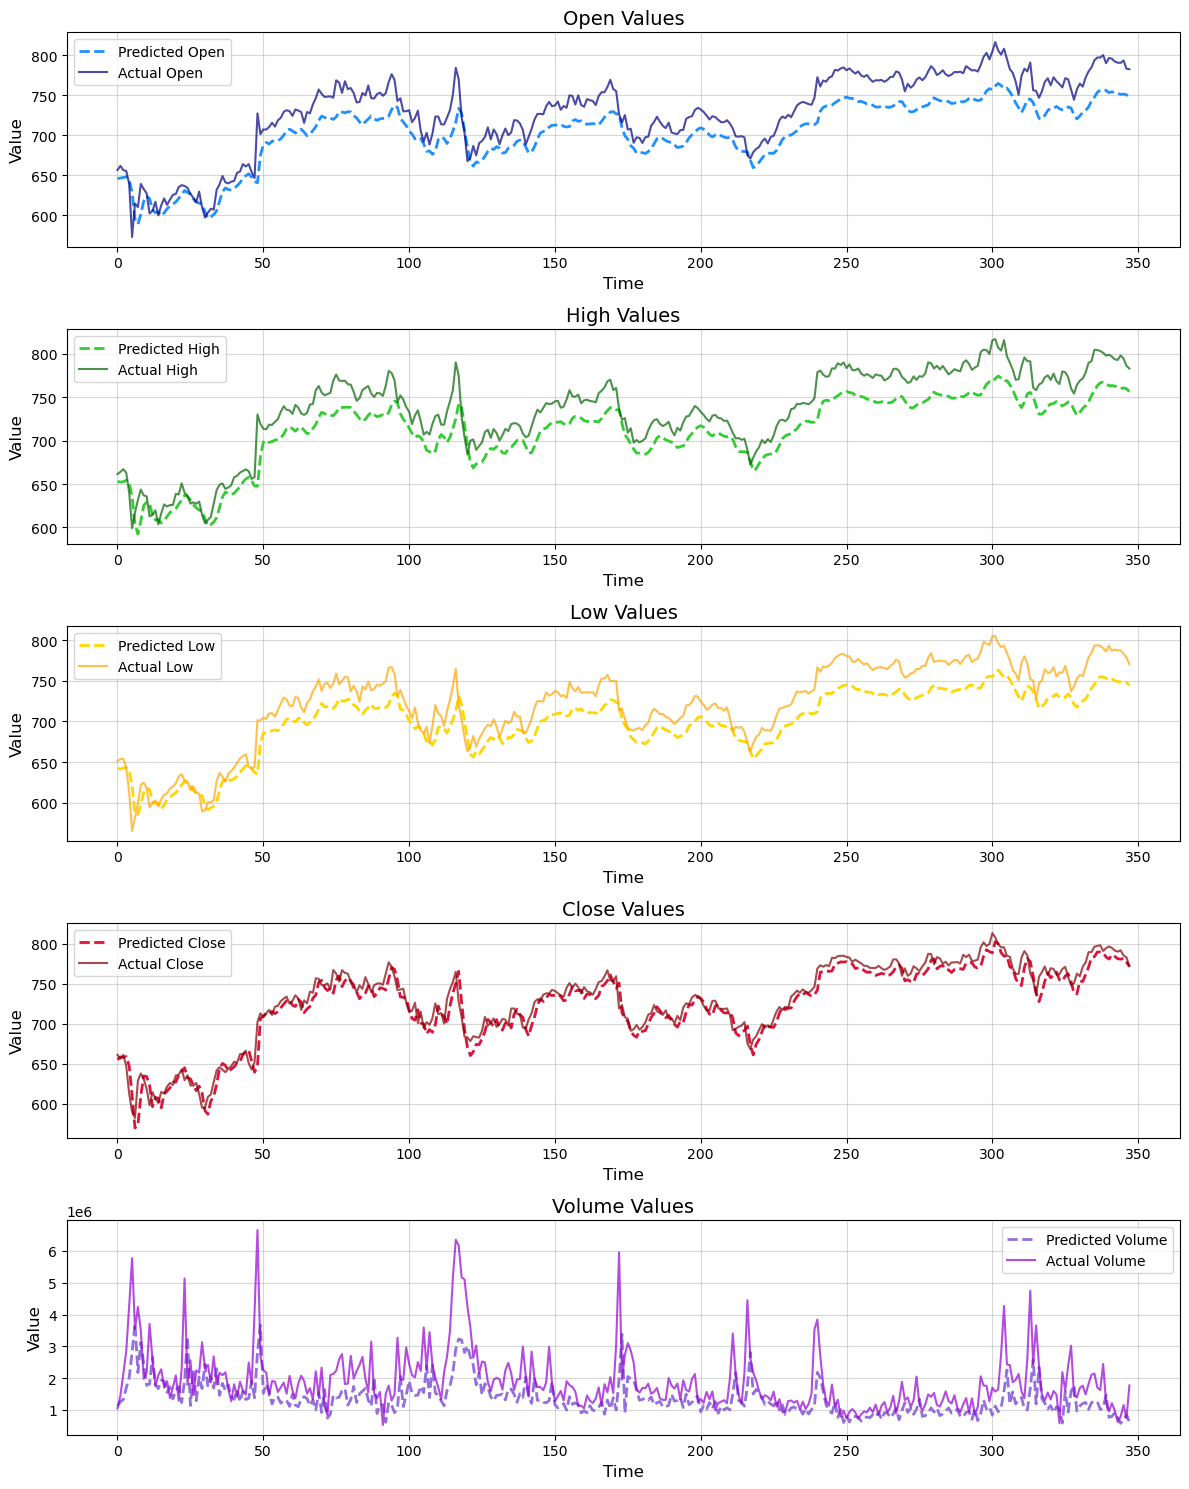

In [195]:
import matplotlib.pyplot as plt

# Define the number of subplots
fig, axes = plt.subplots(5, 1, figsize=(12, 15))

# Titles and labels
titles = ['Open', 'High', 'Low', 'Close', 'Volume']
colors_pred = ['dodgerblue', 'limegreen', 'gold', 'crimson', 'mediumpurple']
colors_actual = ['navy', 'darkgreen', 'orange', 'maroon', 'darkviolet']

# Loop through the columns and plot
for i, ax in enumerate(axes):
    ax.plot(pred[:, i], label=f'Predicted {titles[i]}', color=colors_pred[i], linestyle='--', linewidth=2)
    ax.plot(true_labels[:, i], label=f'Actual {titles[i]}', color=colors_actual[i], alpha=0.7, linewidth=1.5)
    ax.set_title(f'{titles[i]} Values', fontsize=14)
    ax.set_xlabel('Time', fontsize=12)
    ax.set_ylabel('Value', fontsize=12)
    ax.legend()
    ax.grid(alpha=0.5)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [196]:
mse = mean_squared_error(true_labels, pred)
print("Mean Squared Error:", mse)

r2 = r2_score(true_labels, pred)
print("R² Score:", r2)

rmse = root_mean_squared_error(true_labels, pred)
print("RMSE:", rmse)

Mean Squared Error: 172080460000.0
R² Score: 0.6141090989112854
RMSE: 185534.8


# LSTM

In [2]:
from sklearn.preprocessing import MinMaxScaler
bono = pd.read_csv('archive/Google_Stock_Price_Train.csv',parse_dates=True)
bono = bono.iloc[:,1:]

# converting str to str and replacing commas with None:
bono["Volume"] = bono["Volume"].astype(str).str.replace(',', '')

# Converting str to float
bono["Volume"] = bono["Volume"].astype(float)

# converting str to str and replacing commas with None:
bono["Close"] = bono["Close"].astype(str).str.replace(',', '')

# Converting str to float
bono["Close"] = bono["Close"].astype(float)

scaler = MinMaxScaler()
bono[bono.columns] = scaler.fit_transform(bono)


In [5]:

split_data = np.split(bono, [int(.7*len(bono))])
train_scaled, test_scaled = [d for d in split_data]
X_train, y_train = create_seq(train_scaled,30)
X_test, y_test = create_seq(test_scaled,30)


X_train.shape, y_train.shape

((850, 30, 5), (850, 5))

In [6]:
# Convert to PyTorch tensors lmeow
train_data = torch.Tensor(X_train)
train_target = torch.Tensor(y_train)
test_data = torch.Tensor(X_test)
test_target = torch.Tensor(y_test)

In [7]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out
    
model = LSTMModel(5, 50, 2, 5)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [8]:

for epoch in range(1000):
    # Training step
    model.train()
    outputs = model(train_data)
    train_loss = criterion(outputs, train_target)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{1000}], Train Loss: {train_loss.item():.4f}')

Epoch [10/1000], Train Loss: 0.0559
Epoch [20/1000], Train Loss: 0.0361
Epoch [30/1000], Train Loss: 0.0311
Epoch [40/1000], Train Loss: 0.0214
Epoch [50/1000], Train Loss: 0.0079
Epoch [60/1000], Train Loss: 0.0053
Epoch [70/1000], Train Loss: 0.0036
Epoch [80/1000], Train Loss: 0.0028
Epoch [90/1000], Train Loss: 0.0025
Epoch [100/1000], Train Loss: 0.0024
Epoch [110/1000], Train Loss: 0.0023
Epoch [120/1000], Train Loss: 0.0022
Epoch [130/1000], Train Loss: 0.0022
Epoch [140/1000], Train Loss: 0.0021
Epoch [150/1000], Train Loss: 0.0021
Epoch [160/1000], Train Loss: 0.0020
Epoch [170/1000], Train Loss: 0.0020
Epoch [180/1000], Train Loss: 0.0020
Epoch [190/1000], Train Loss: 0.0019
Epoch [200/1000], Train Loss: 0.0019
Epoch [210/1000], Train Loss: 0.0019
Epoch [220/1000], Train Loss: 0.0019
Epoch [230/1000], Train Loss: 0.0019
Epoch [240/1000], Train Loss: 0.0018
Epoch [250/1000], Train Loss: 0.0018
Epoch [260/1000], Train Loss: 0.0018
Epoch [270/1000], Train Loss: 0.0018
Epoch [280

In [9]:

# Test
model.eval()
with torch.no_grad():
    pred = model(test_data).numpy()
    true_labels = test_target.numpy()
pred = scaler.inverse_transform(pred)
true_labels = scaler.inverse_transform(true_labels)




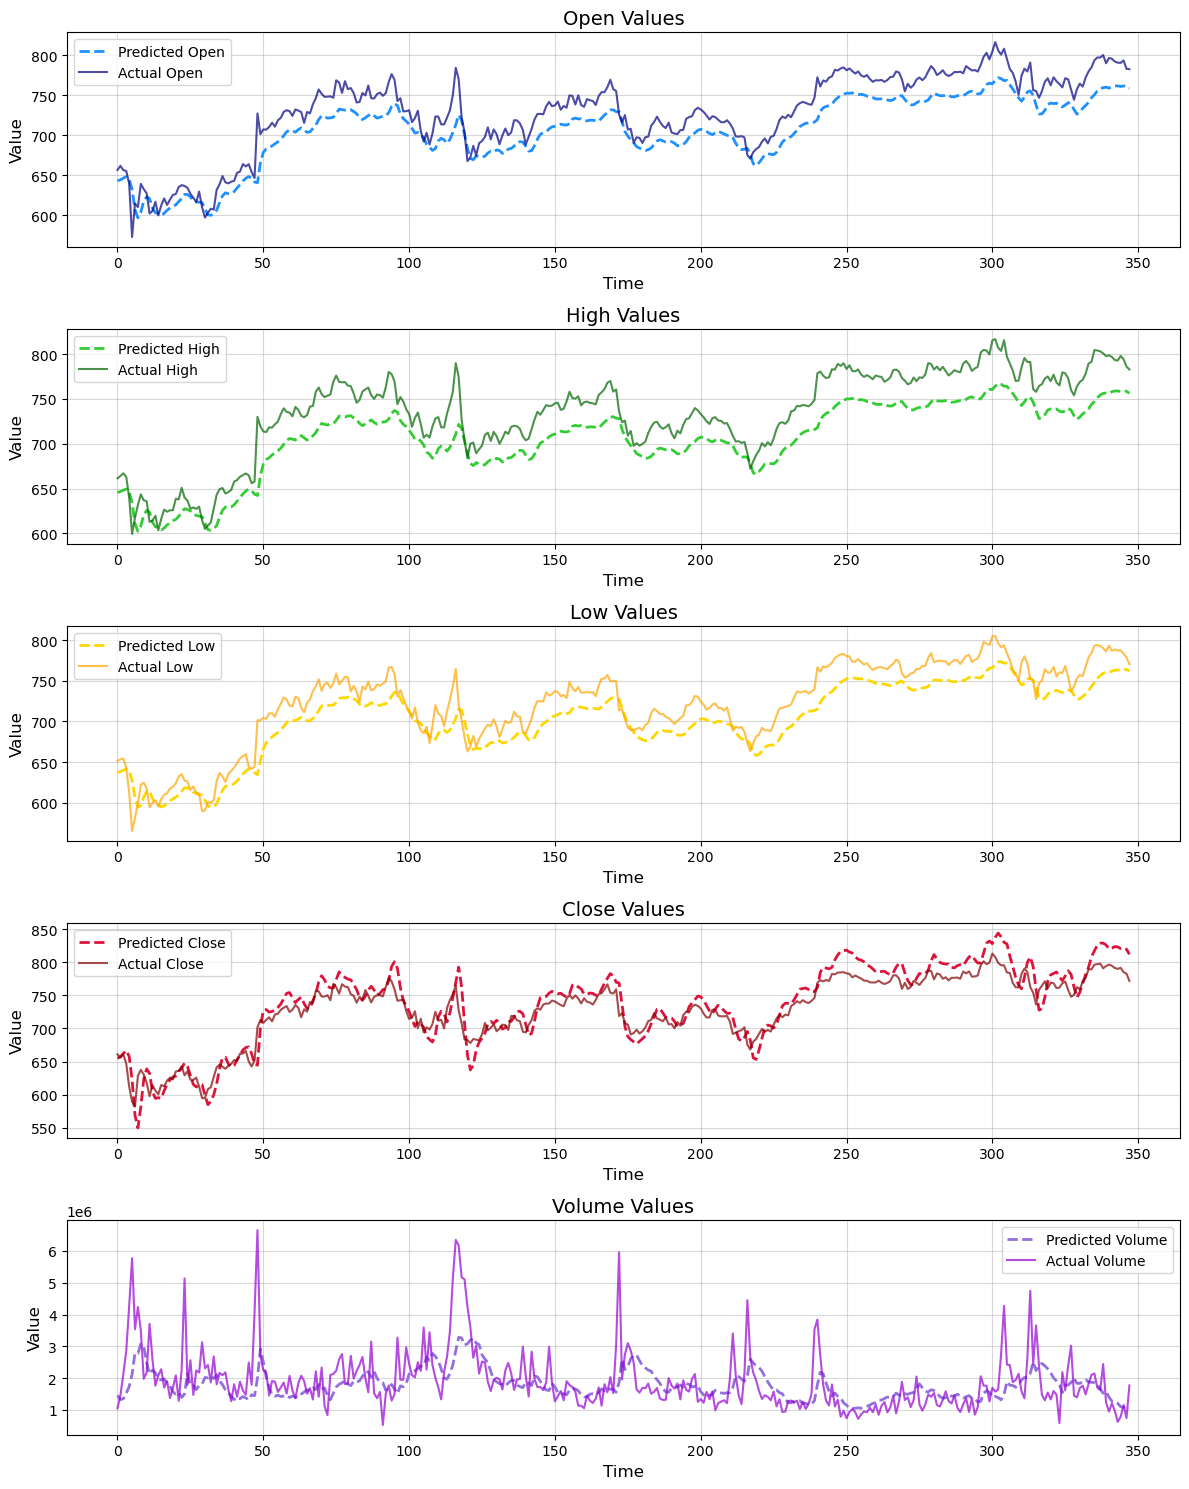

In [10]:
import matplotlib.pyplot as plt

# Define the number of subplots
fig, axes = plt.subplots(5, 1, figsize=(12, 15))

# Titles and labels
titles = ['Open', 'High', 'Low', 'Close', 'Volume']
colors_pred = ['dodgerblue', 'limegreen', 'gold', 'crimson', 'mediumpurple']
colors_actual = ['navy', 'darkgreen', 'orange', 'maroon', 'darkviolet']

# Loop through the columns and plot
for i, ax in enumerate(axes):
    ax.plot(pred[:, i], label=f'Predicted {titles[i]}', color=colors_pred[i], linestyle='--', linewidth=2)
    ax.plot(true_labels[:, i], label=f'Actual {titles[i]}', color=colors_actual[i], alpha=0.7, linewidth=1.5)
    ax.set_title(f'{titles[i]} Values', fontsize=14)
    ax.set_xlabel('Time', fontsize=12)
    ax.set_ylabel('Value', fontsize=12)
    ax.legend()
    ax.grid(alpha=0.5)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [11]:
mse = mean_squared_error(true_labels, pred)
print("Mean Squared Error:", mse)

r2 = r2_score(true_labels, pred)
print("R² Score:", r2)

rmse = root_mean_squared_error(true_labels, pred)
print("RMSE:", rmse)

Mean Squared Error: 136556890000.0
R² Score: 0.6333795785903931
RMSE: 165281.98
